In [7]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

import common

warnings.filterwarnings('ignore')

In [8]:
# ЗАГРУЗКА ПРИЗНАКОВ И МЕТОК

labels = pd.read_csv(common.LabelsPath)
features = pd.read_csv(common.FeaturesPath)

X = np.array(features)
y = np.array(labels).reshape(len(labels))

In [9]:
# МАСШТАБИРОВАНИЕ ПРИЗНАКОВ

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [16]:
# ПОИСК ЛУЧШИХ ПАРАМЕТРОВ MLP

alpha = [10**i for i in range(-7, 3)]
hidden_layer_size = [i for i in range(5, 30, 3)]
param_grid = {"alpha": alpha, "hidden_layer_sizes": hidden_layer_size}

mlp = MLPClassifier(random_state=1)

gs = GridSearchCV(estimator=mlp, param_grid=param_grid, return_train_score=True)
gs.fit(X, y)

GridSearchCV(estimator=MLPClassifier(random_state=1),
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 1, 10, 100],
                         'hidden_layer_sizes': [5, 8, 11, 14, 17, 20, 23, 26,
                                                29]},
             return_train_score=True)

In [14]:
pvt1 = pd.pivot_table(pd.DataFrame(gs.cv_results_),
                      values='mean_train_score', index='param_alpha', columns='param_hidden_layer_sizes')
pvt2 = pd.pivot_table(pd.DataFrame(gs.cv_results_),
                      values='mean_test_score', index='param_alpha', columns='param_hidden_layer_sizes')

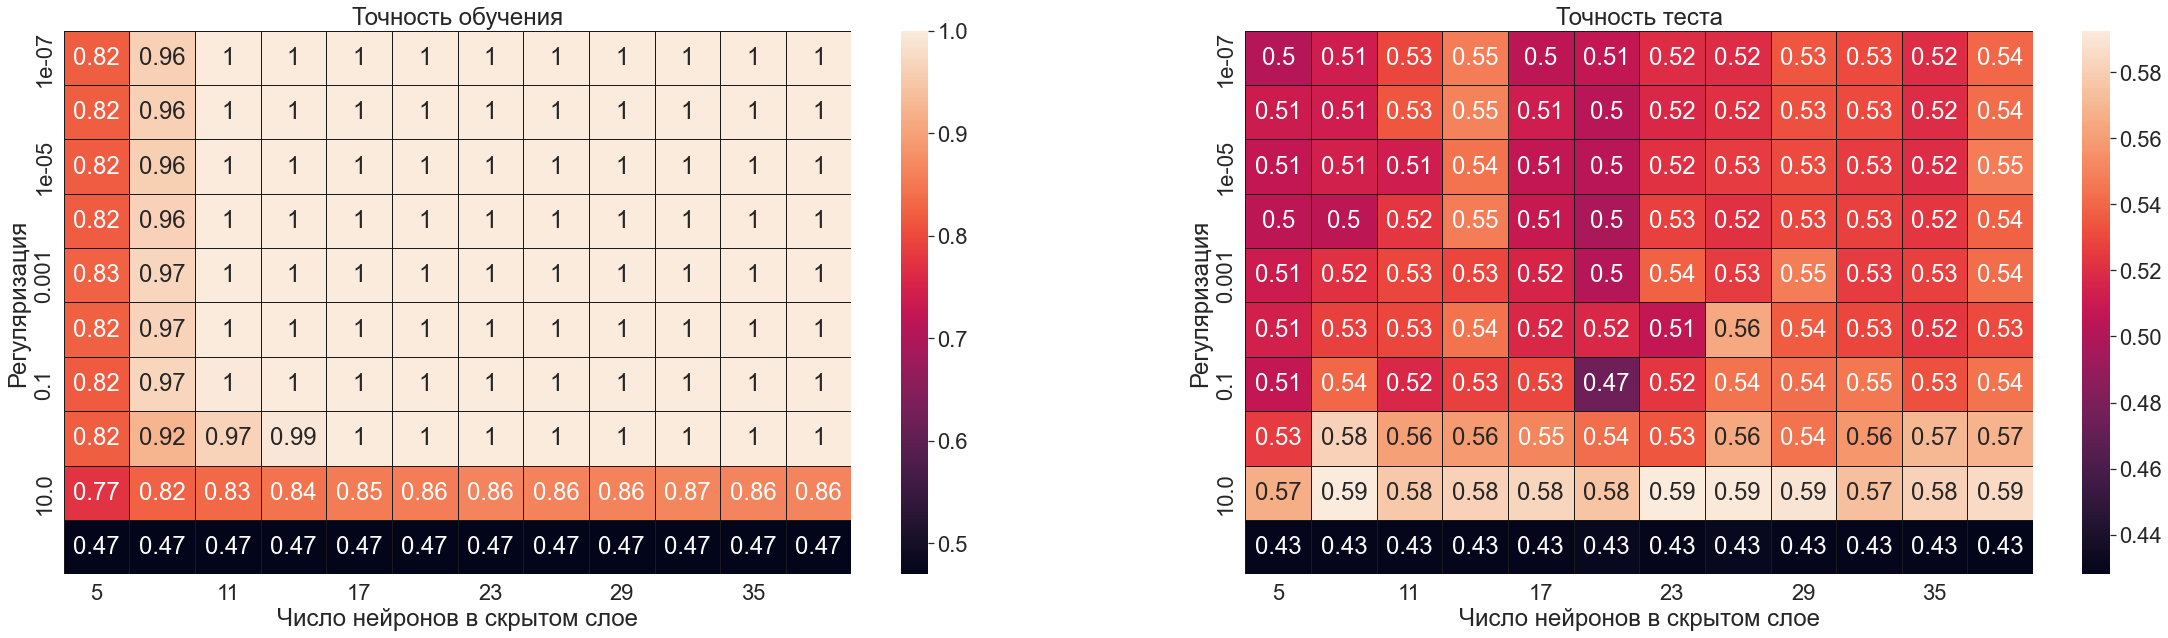

In [15]:
# Строим тепловые карты

plt.figure(figsize=(60,10))

# Точность обучения
plt.subplot(1,3,1)
ax = sns.heatmap(pvt1, linewidths=1, linecolor='k', annot=True, xticklabels=2, yticklabels=2)
ax.set(title="Точность обучения",
       xlabel="Число нейронов в скрытом слое",
       ylabel="Регуляризация")
sns.set(font_scale=2)

# Точность теста
plt.subplot(1,3,2)
ax = sns.heatmap(pvt2, linewidths=1, linecolor='k', annot=True, xticklabels=2, yticklabels=2)
ax.set(title="Точность теста",
       xlabel="Число нейронов в скрытом слое",
       ylabel="Регуляризация")
sns.set(font_scale=2)

plt.show()